In [1]:
!pip install earthengine-api

In [1]:
from tqdm import tqdm
import pandas as pd
import ee
from datetime import datetime


In [7]:
#ee.Authenticate()

Enter verification code:  4/1AfJohXlQKToMncpdd96tRKDdOpGaO23yqQOTZRDN02VYuaSlABCaIURf6JA



Successfully saved authorization token.


In [8]:
# Cargar el dataset
file_path = 'Data/data_Galicia/dataset_unificado_imputed_ajustado_limpio.csv'
df = pd.read_csv(file_path).sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13535 entries, 0 to 13534
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitude               13535 non-null  float64
 1   longitude              13535 non-null  float64
 2   acq_date               13535 non-null  object 
 3   daynight               13535 non-null  object 
 4   location_info          13535 non-null  object 
 5   Provincia              13535 non-null  object 
 6   Comunidad_Autonoma     13535 non-null  object 
 7   Estacion               13535 non-null  object 
 8   Fecha                  13535 non-null  object 
 9   Humedad foliar         13535 non-null  float64
 10  Humedad relativa       13535 non-null  float64
 11  Humedad suelo          13535 non-null  float64
 12  Precipitación          13535 non-null  float64
 13  Temperatura del suelo  13535 non-null  float64
 14  Viento                 13535 non-null  float64
 15  in

In [10]:
# Inicializar Earth Engine
ee.Initialize()

# Definir un punto de interés
punto = ee.Geometry.Point([-7.447233, 42.231557])

# Importar la colección Landsat 8 TOA
l8 = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA')

# Filtrar la colección por ubicación y fecha
l8_filtrado = l8.filterBounds(punto).filterDate(datetime(2023, 1, 1), datetime(2023, 12, 31))

# Seleccionar la banda de NIR y la banda roja de la primera imagen en la colección
imagen = ee.Image(l8_filtrado.first())
nir = imagen.select('B5')
red = imagen.select('B4')

# Calcular NDVI
ndvi = nir.subtract(red).divide(nir.add(red)).rename('NDVI')

# Obtener el valor de NDVI en el punto de interés
valor_ndvi = ndvi.reduceRegion(reducer=ee.Reducer.first(), geometry=punto, scale=30).get('NDVI').getInfo()

# Imprimir el valor de NDVI
print(f"Valor de NDVI en el punto: {valor_ndvi}")

Valor de NDVI en el punto: 0.4732240297676807


In [11]:
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """


' NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO '

In [12]:
# Inicializar Earth Engine
ee.Initialize()

# Definir la función para calcular el NDVI
def calcular_ndvi(row):
    # Definir un punto de interés para cada fila del DataFrame
    punto = ee.Geometry.Point([row['longitude'], row['latitude']])
    
    # Importar la colección Landsat 8 TOA
    l8 = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA')
    
    # Fijar el período
    fecha_inicio = datetime(2023, 1, 1)
    fecha_fin = datetime(2023, 12, 31)
    
    # Filtrar la colección por ubicación y fecha
    l8_filtrado = l8.filterBounds(punto).filterDate(fecha_inicio, fecha_fin)
    
    # Seleccionar la banda de NIR y la banda roja de la primera imagen en la colección
    imagen = ee.Image(l8_filtrado.first())
    nir = imagen.select('B5')
    red = imagen.select('B4')
    
    # Calcular NDVI
    ndvi = nir.subtract(red).divide(nir.add(red)).rename('NDVI')
    
    # Obtener el valor de NDVI en el punto de interés
    valor_ndvi = ndvi.reduceRegion(reducer=ee.Reducer.first(), geometry=punto, scale=30).get('NDVI').getInfo()
    
    return valor_ndvi

# Aplicar la función a cada fila del DataFrame y agregar los resultados a una nueva columna 'NDVI'
df['NDVI'] = 0.0  # Inicializar la columna 'NDVI' con ceros

# Usar tqdm para agregar una barra de progreso
for idx, row in tqdm(df.iterrows(), total=len(df)):
    df.at[idx, 'NDVI'] = calcular_ndvi(row)

# Imprimir el DataFrame con la nueva columna 'NDVI'
print(df)

100%|██████████| 13535/13535 [1:07:43<00:00,  3.33it/s]

        latitude  longitude    acq_date daynight  \
0      42.311600  -7.714200  2011-10-16        N   
1      42.297200  -6.752200  2016-08-07        D   
2      42.819981  -8.886052  2010-01-23        N   
3      42.851100  -9.019700  2009-04-23        D   
4      41.967000  -7.348100  2017-08-04        N   
...          ...        ...         ...      ...   
13530  42.641500  -8.243500  2017-10-13        N   
13531  43.244292  -7.472349  2019-05-21        D   
13532  42.768100  -6.930900  2017-10-15        N   
13533  42.002700  -6.982800  2010-08-30        D   
13534  42.862983  -7.494820  2011-08-19        D   

                                           location_info   Provincia  \
0      As Achas, A Granxa, Vilar de Ordelles, Esgos, ...     Ourense   
1      A Lomba, Casaio, Carballeda de Valdeorras, Val...     Ourense   
2      Seilán de Abaixo, Seilán, Tarás, Outes, Noia, ...    A Coruña   
3      Fonte Semias, Torea, Muros, A Coruña, Galicia,...    A Coruña   
4      Feilas, 

In [15]:
df.to_csv('Data/data_Galicia/dataset_unificado_imputed_ajustado_limpio_NDVI.csv', index=False)

In [14]:
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """

' FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO '

In [16]:
# Cargar el dataset
file_path = 'Data/data_Galicia/dataset_unificado_imputed_ajustado_limpio_NDVI.csv'
df = pd.read_csv(file_path).sample(frac=1, random_state=42).reset_index(drop=True)

In [17]:
df

,latitude,longitude,acq_date,daynight,location_info,Provincia,Comunidad_Autonoma,Estacion,Fecha,Humedad foliar,Humedad relativa,Humedad suelo,Precipitación,Temperatura del suelo,Viento,incendio,municipio,Mes,NDVI
0,42.186200,-8.730100,2017-10-15,N,"Valadares, Vigo, Pontevedra, Galicia, 36315, E...",Pontevedra,Galicia,ponteareas,2017-10-15,0.0,81.0,0.1,0.40,15.3,1.40,1,NaN,10,0.596040
1,42.240795,-7.240708,2013-03-01,D,"Val de Sabas, Cernado, Manzaneda, Terra de Tri...",Ourense,Galicia,a veiga,2013-03-01,0.0,90.0,0.3,17.70,3.7,15.50,0,NaN,3,0.587702
2,43.164341,-7.729773,2017-02-21,N,"O Touredo, Bóveda, Begonte, Terra Chá, Lugo, G...",Lugo,Galicia,mondonedo,2017-02-21,8.9,99.0,0.4,0.00,11.3,3.70,0,NaN,2,0.498596
3,42.234830,-8.162756,2013-05-14,N,"Meréns, Cortegada, O Ribeiro, Ourense, Galicia...",Ourense,Galicia,castrelo de mino,2013-05-14,6.6,74.0,78.8,0.00,18.9,4.10,0,NaN,5,0.600559
4,41.852500,-7.587900,2011-08-13,D,"Estrada de Oímbra a Videferre, Bousés, Videfer...",Ourense,Galicia,calvos de randin,2011-08-13,4.6,66.0,0.0,0.00,20.0,4.10,1,NaN,8,0.424308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13530,43.379606,-8.046095,2021-01-27,N,"Os Fornos, Queixeiro, Monfero, O Eume, A Coruñ...",A Coruña,Galicia,naron,2021-01-27,11.8,78.8,0.4,16.90,6.6,3.20,0,NaN,1,0.543556
13531,42.690772,-8.616391,2009-05-31,N,"EP-8501, As Laceiras, Valga, Caldas, Pontevedr...",Pontevedra,Galicia,lousame,2009-05-31,0.0,46.0,0.3,5.14,17.6,12.72,0,NaN,5,0.643202
13532,43.565432,-7.704951,2014-09-20,N,"Pista de Toxoso, Toxoso do Medio, Toxoso, Ambo...",Lugo,Galicia,mondonedo,2014-09-20,4.6,84.0,0.1,1.20,19.7,4.40,0,NaN,9,0.417679
13533,42.392139,-8.271257,2008-04-26,D,"Abelenda, Avión, O Ribeiro, Ourense, Galicia, ...",Ourense,Galicia,castrelo de mino,2008-04-26,0.0,76.0,0.1,0.00,15.5,1.40,0,NaN,4,0.597915


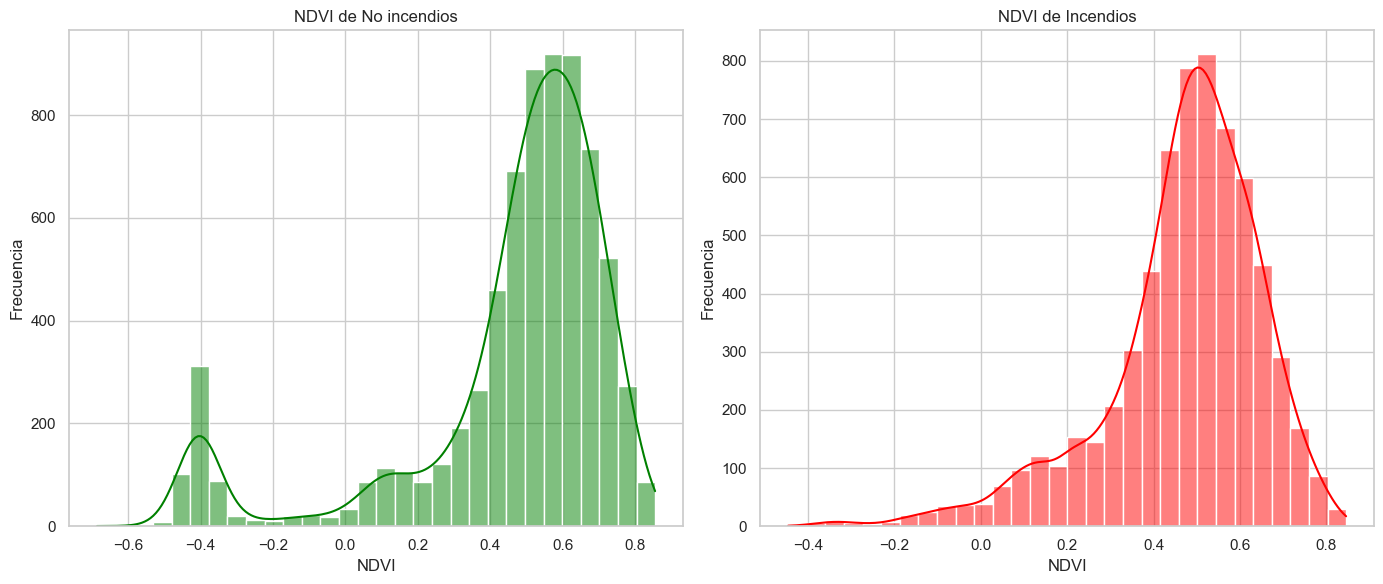

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear figura y ejes para los subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Subplot 1: NDVI de incendios en verde
sns.histplot(df[(df['incendio'] ==0)]['NDVI'], bins=30, color='green', kde=True, ax=axes[0])
axes[0].set_title('NDVI de No incendios')
axes[0].set_xlabel('NDVI')
axes[0].set_ylabel('Frecuencia')

# Subplot 2: NDVI de no incendios en rojo
sns.histplot(df[(df['incendio'] ==1)]['NDVI'], bins=30, color='red', kde=True, ax=axes[1])
axes[1].set_title('NDVI de Incendios')
axes[1].set_xlabel('NDVI')
axes[1].set_ylabel('Frecuencia')

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()



TRATAMIENTO CON LOS DATOS DEL 2022

In [19]:
# Cargar datos
file_path = 'Data/data_Galicia/datos_Galicia_prueba_modelo.csv'
df = pd.read_csv(file_path).sample(frac=1, random_state=42).reset_index(drop=True)

In [20]:
# Inicializar Earth Engine
ee.Initialize()

# Definir la función para calcular el NDVI
def calcular_ndvi(row):
    # Definir un punto de interés para cada fila del DataFrame
    punto = ee.Geometry.Point([row['longitude'], row['latitude']])
    
    # Importar la colección Landsat 8 TOA
    l8 = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA')
    
    # Fijar el período
    fecha_inicio = datetime(2023, 1, 1)
    fecha_fin = datetime(2023, 12, 31)
    
    # Filtrar la colección por ubicación y fecha
    l8_filtrado = l8.filterBounds(punto).filterDate(fecha_inicio, fecha_fin)
    
    # Seleccionar la banda de NIR y la banda roja de la primera imagen en la colección
    imagen = ee.Image(l8_filtrado.first())
    nir = imagen.select('B5')
    red = imagen.select('B4')
    
    # Calcular NDVI
    ndvi = nir.subtract(red).divide(nir.add(red)).rename('NDVI')
    
    # Obtener el valor de NDVI en el punto de interés
    valor_ndvi = ndvi.reduceRegion(reducer=ee.Reducer.first(), geometry=punto, scale=30).get('NDVI').getInfo()
    
    return valor_ndvi

# Aplicar la función a cada fila del DataFrame y agregar los resultados a una nueva columna 'NDVI'
df['NDVI'] = 0.0  # Inicializar la columna 'NDVI' con ceros

# Usar tqdm para agregar una barra de progreso
for idx, row in tqdm(df.iterrows(), total=len(df)):
    df.at[idx, 'NDVI'] = calcular_ndvi(row)

# Imprimir el DataFrame con la nueva columna 'NDVI'
df

100%|██████████| 1565/1565 [07:55<00:00,  3.29it/s]


,latitude,longitude,acq_date,daynight,location_info,Provincia,Comunidad_Autonoma,Estacion,Fecha,Humedad foliar,Humedad relativa,Humedad suelo,Precipitación,Temperatura del suelo,Viento,incendio,municipio,Mes,NDVI
0,42.338600,-6.903400,2022-07-19,N,"Poula das Borraxes, Riodolas, Carballeda de Va...",Ourense,Galicia,a veiga,2022-07-19,14.2,43.00,0.10,0.0,17.2,5.70,1,NaN,7,0.343347
1,42.386500,-7.036100,2022-07-17,N,"As Fontelas, Fervenza, Santa Mariña do Monte, ...",Ourense,Galicia,a veiga,2022-07-17,3.5,37.00,0.10,0.0,16.8,6.40,1,NaN,7,0.326087
2,42.180783,-7.918151,2022-09-24,D,"Fechiñas, Fechas, Celanova, Terra da Celanova,...",Ourense,Galicia,castrelo de mino,2022-09-24,0.0,62.00,65.20,0.0,21.2,3.20,0,NaN,9,0.572844
3,42.122414,-7.716826,2022-09-25,D,"Cardeita, Sandiás, A Limia, Ourense, Galicia, ...",Ourense,Galicia,calvos de randin,2022-09-25,2.8,83.00,0.20,0.0,13.7,2.70,0,NaN,9,0.747877
4,42.908700,-7.932100,2022-07-12,N,"Labagueira, Cuíña, Palas de Rei, A Ulloa, Lugo...",Lugo,Galicia,antas de ulla,2022-07-12,0.0,72.00,0.00,0.0,18.8,5.80,1,NaN,7,0.517728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,43.310918,-7.398324,2022-12-04,D,"As Maciñeiras, A Regueira, A Pastoriza, Terra ...",Lugo,Galicia,mondonedo,2022-12-04,13.2,78.00,0.30,0.0,9.4,4.60,0,NaN,12,0.683891
1561,42.870398,-8.684124,2022-10-26,D,"O Rial de Abaixo, Guldrís, Brión, Santiago, A ...",A Coruña,Galicia,val do dubra,2022-10-26,17.1,87.68,10.04,0.6,14.1,6.00,0,NaN,10,0.724934
1562,42.642900,-8.964300,2022-08-05,N,"Estrada da Curota, Lesón, A Pobra do Caramiñal...",A Coruña,Galicia,boiro,2022-08-05,0.0,100.00,0.10,0.0,24.8,15.60,1,NaN,8,0.332198
1563,42.416253,-7.787290,2022-05-06,N,"Andelo, Graíces, A Peroxa, Ourense, Galicia, 3...",Ourense,Galicia,chantada,2022-05-06,0.0,71.00,0.10,0.0,19.6,7.80,0,NaN,5,0.592688


In [22]:
df.to_csv('Data/data_Galicia/datos_Galicia_prueba_modelo_NDVI.csv', index=False)

DÍA DE PRUEBA

Creación del dataset

In [23]:
# Importar las bibliotecas necesarias
import geopandas as gpd
import random
from shapely.geometry import Point
from tqdm import tqdm
import pandas as pd

# Cargar el archivo que contiene los límites de Galicia (shapefile, GeoJSON, etc.)
datos_galicia = gpd.read_file('Data/map_spain/galicia.geojson')  

# Obtener el límite de Galicia (podría ser una sola geometría o múltiples)
limite_galicia = datos_galicia.geometry.unary_union

# Función para generar coordenadas aleatorias dentro del límite de Galicia
def generar_coordenadas_random():
    while True:
        # Generar coordenadas aleatorias dentro de un rango específico
        latitud = random.uniform(limite_galicia.bounds[1], limite_galicia.bounds[3])
        longitud = random.uniform(limite_galicia.bounds[0], limite_galicia.bounds[2])
        
        # Crear un punto con las coordenadas aleatorias
        punto = Point(longitud, latitud)
        
        # Verificar si el punto está dentro del límite de Galicia
        if punto.within(limite_galicia):
            return punto

# Generar 20000 coordenadas aleatorias dentro de Galicia con barra de progreso
coordenadas_random_galicia = []
for _ in tqdm(range(20000), desc='Generando coordenadas'):
    coordenadas_random_galicia.append(generar_coordenadas_random())

# Convertir las coordenadas a un DataFrame
df_coordenadas = pd.DataFrame({'Longitud': [p.x for p in coordenadas_random_galicia],
                               'Latitud': [p.y for p in coordenadas_random_galicia]})


Generando coordenadas: 100%|██████████| 20000/20000 [00:02<00:00, 7882.99it/s]


In [24]:
df_day = df_coordenadas
df_day

,Longitud,Latitud
0,-8.909793,41.880602
1,-7.098114,42.684984
2,-8.073503,43.093246
3,-7.272180,42.135950
4,-7.414720,42.035572
...,...,...
19995,-8.309146,43.611393
19996,-9.072445,42.812600
19997,-7.206696,42.612108
19998,-8.102983,42.471698


In [25]:
from geopy.geocoders import Nominatim 
geolocator = Nominatim(user_agent="prediccion_incendions") 
location = geolocator.reverse("43.4086, -4.9979") 
print(location.address) 

Carretera Corao - Cuevas del Mar, Urbanización La Barria, Fresnedo, Nueva, Llanes, Asturias / Asturies, 33591, España


In [26]:
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """

' NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO '

In [30]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
from tqdm.auto import tqdm
import time

# Configurar el geolocalizador
geolocator = Nominatim(user_agent="prediccion_incendions")

def safe_geolocate(lat, lon, attempt=1, max_attempts=3):
# Intenta obtener la geolocalización inversa con manejo de errores y reintentos.
    try:
        return geolocator.reverse((lat, lon), exactly_one=True, timeout=10)
    except (GeocoderTimedOut, GeocoderUnavailable):
        if attempt <= max_attempts:
            time.sleep(10)  # Espera antes de reintentar
            return safe_geolocate(lat, lon, attempt + 1, max_attempts)
        return None

# Inicializa la columna si aún no existe
if 'location_info' not in df_day.columns:
    df_day['location_info'] = None

# Procesa las filas que no han sido procesadas aún
for index, row in tqdm(df_day.iterrows(), total=df_day.shape[0]):
    if pd.isna(row['location_info']):
        location = safe_geolocate(row['Latitud'], row['Longitud'])
        if location and location.raw.get('address'):
            df_day.at[index, 'location_info'] = location.address
        else:
            df_day.at[index, 'location_info'] = 'No Disponible'
        # Guarda cada mil iteraciones o al final del DataFrame
        if index % 1000 == 0 or index == df_day.shape[0] - 1:
            df_day.to_csv('Data/data_Galicia/coord_prueba_intermedio.csv', index=False)

# Nota: El guardado intermedio se realiza cada mil filas procesadas.

'import pandas as pd\nfrom geopy.geocoders import Nominatim\nfrom geopy.exc import GeocoderTimedOut, GeocoderUnavailable\nfrom tqdm.auto import tqdm\nimport time\n\n# Configurar el geolocalizador\ngeolocator = Nominatim(user_agent="prediccion_incendions")\n\ndef safe_geolocate(lat, lon, attempt=1, max_attempts=3):\n# Intenta obtener la geolocalización inversa con manejo de errores y reintentos.\n    try:\n        return geolocator.reverse((lat, lon), exactly_one=True, timeout=10)\n    except (GeocoderTimedOut, GeocoderUnavailable):\n        if attempt <= max_attempts:\n            time.sleep(10)  # Espera antes de reintentar\n            return safe_geolocate(lat, lon, attempt + 1, max_attempts)\n        return None\n\n# Inicializa la columna si aún no existe\nif \'location_info\' not in df_day.columns:\n    df_day[\'location_info\'] = None\n\n# Procesa las filas que no han sido procesadas aún\nfor index, row in tqdm(df_day.iterrows(), total=df_day.shape[0]):\n    if pd.isna(row[\'loca

In [ ]:
# Guardar el DataFrame concatenado como un archivo CSV
df_day.to_csv('Data/data_Galicia/coord_prueba.csv', index=False)

In [ ]:
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """

In [31]:
df_day = pd.read_csv("Data/data_Galicia/coord_prueba.csv")

In [32]:
df_day

,Longitud,Latitud,location_info,provincia,municipio
0,-7.835381,42.505886,"N-540, O Piñeiro, Santa Baia de Búbal, Carball...",Galicia,Carballedo
1,-9.044049,42.894181,"Coiro, Mazaricos, O Xallas, A Coruña, Galicia,...",Galicia,Mazaricos
2,-8.854150,42.442984,"O Tombelo, Noalla, Sanxenxo, O Salnés, Ponteve...",Galicia,Sanxenxo
3,-7.830883,43.648142,"A Igrexa, Os Freires, Ortigueira, Ortegal, A C...",Galicia,NaN
4,-7.412678,43.411225,"Camiño da Infesta, Pacios de Arriba, Cesuras, ...",Galicia,NaN
...,...,...,...,...,...
19995,-7.468132,43.965118,No Disponible,NaN,NaN
19996,-7.557561,42.648059,"LU-P-0905, Outeiro, A Broza, O Saviñao, Terra ...",Galicia,O Saviñao
19997,-8.976824,43.142748,"O Campo, Bamiro, Vimianzo, Terra de Soneira, A...",Galicia,Vimianzo
19998,-8.583028,43.251158,"Rúa Ponte da Balsa, A Montaña, O Campo, Torás,...",Galicia,A Laracha


In [33]:
# Filtrar filas donde 'location_info' no sea nulo y contenga 'Galicia' (sin distinguir mayúsculas y minúsculas)
df_galicia = df_day[df_day['location_info'].notnull() & df_day['location_info'].str.contains('Galicia', case=False)]


In [34]:
df_day = df_galicia
df_galicia

,Longitud,Latitud,location_info,provincia,municipio
0,-7.835381,42.505886,"N-540, O Piñeiro, Santa Baia de Búbal, Carball...",Galicia,Carballedo
1,-9.044049,42.894181,"Coiro, Mazaricos, O Xallas, A Coruña, Galicia,...",Galicia,Mazaricos
2,-8.854150,42.442984,"O Tombelo, Noalla, Sanxenxo, O Salnés, Ponteve...",Galicia,Sanxenxo
3,-7.830883,43.648142,"A Igrexa, Os Freires, Ortigueira, Ortegal, A C...",Galicia,NaN
4,-7.412678,43.411225,"Camiño da Infesta, Pacios de Arriba, Cesuras, ...",Galicia,NaN
...,...,...,...,...,...
19994,-9.016673,43.243534,"Carreiro Bo, Laxe, Bergantiños, A Coruña, Gali...",Galicia,Laxe
19996,-7.557561,42.648059,"LU-P-0905, Outeiro, A Broza, O Saviñao, Terra ...",Galicia,O Saviñao
19997,-8.976824,43.142748,"O Campo, Bamiro, Vimianzo, Terra de Soneira, A...",Galicia,Vimianzo
19998,-8.583028,43.251158,"Rúa Ponte da Balsa, A Montaña, O Campo, Torás,...",Galicia,A Laracha


In [35]:
from geopy.geocoders import Nominatim
import pandas as pd
from tqdm import tqdm

# Lista de provincias españolas
provincias_espanolas = ['A Coruña', 'Lugo', 'Ourense', 'Pontevedra']

# Función para actualizar la columna 'provincia' basada en 'location_info'
def actualizar_provincia(row):
    matching_provinces = [provincia for provincia in provincias_espanolas if provincia in row['location_info']]
    if len(matching_provinces) == 1:
        return matching_provinces[0]
    else:
        return pd.NA if len(matching_provinces) == 0 else 'Multiple'  # Devuelve NaN si no hay coincidencias, 'Multiple' si hay más de una

# Aplicar la función para actualizar la columna 'provincia'
df_day['provincia'] = df_day.apply(actualizar_provincia, axis=1)


# Mostrar el DataFrame con la columna 'provincia' actualizada
print(df_day[['Latitud', 'Longitud', 'provincia']])

# Guardar el DataFrame modificado como un archivo CSV
df_day.to_csv('Data/data_Galicia/coord_prueba_prov.csv', index=False)


         Latitud  Longitud   provincia
0      42.505886 -7.835381        Lugo
1      42.894181 -9.044049    A Coruña
2      42.442984 -8.854150  Pontevedra
3      43.648142 -7.830883    A Coruña
4      43.411225 -7.412678        Lugo
...          ...       ...         ...
19994  43.243534 -9.016673    A Coruña
19996  42.648059 -7.557561        Lugo
19997  43.142748 -8.976824    A Coruña
19998  43.251158 -8.583028    A Coruña
19999  42.020625 -7.382225     Ourense

[16912 rows x 3 columns]


C:\Users\oscar\AppData\Local\Temp\ipykernel_14476\1174476570.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['provincia'] = df_day.apply(actualizar_provincia, axis=1)


In [36]:
df_day = pd.read_csv("Data/data_Galicia/coord_prueba_prov.csv")
df_day

,Longitud,Latitud,location_info,provincia,municipio
0,-7.835381,42.505886,"N-540, O Piñeiro, Santa Baia de Búbal, Carball...",Lugo,Carballedo
1,-9.044049,42.894181,"Coiro, Mazaricos, O Xallas, A Coruña, Galicia,...",A Coruña,Mazaricos
2,-8.854150,42.442984,"O Tombelo, Noalla, Sanxenxo, O Salnés, Ponteve...",Pontevedra,Sanxenxo
3,-7.830883,43.648142,"A Igrexa, Os Freires, Ortigueira, Ortegal, A C...",A Coruña,NaN
4,-7.412678,43.411225,"Camiño da Infesta, Pacios de Arriba, Cesuras, ...",Lugo,NaN
...,...,...,...,...,...
16907,-9.016673,43.243534,"Carreiro Bo, Laxe, Bergantiños, A Coruña, Gali...",A Coruña,Laxe
16908,-7.557561,42.648059,"LU-P-0905, Outeiro, A Broza, O Saviñao, Terra ...",Lugo,O Saviñao
16909,-8.976824,43.142748,"O Campo, Bamiro, Vimianzo, Terra de Soneira, A...",A Coruña,Vimianzo
16910,-8.583028,43.251158,"Rúa Ponte da Balsa, A Montaña, O Campo, Torás,...",A Coruña,A Laracha


In [37]:
import ee

try:
    # Inicializar el cliente de Earth Engine
    ee.Initialize()

    # Cargar una imagen de satélite Landsat
    imagen = ee.Image('LANDSAT/LC08/C01/T1/LC08_044034_20140318')

    # Obtener información de la imagen
    info_imagen = imagen.getInfo()

    print("Earth Engine está inicializado correctamente.")
    print("Información de la imagen de satélite Landsat:", info_imagen)
except ee.EEException as e:
    print("Error al inicializar Earth Engine:", e)
except Exception as e:
    print("Error:", e)


Earth Engine está inicializado correctamente.
Información de la imagen de satélite Landsat: {'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7661, 7801], 'crs': 'EPSG:32610', 'crs_transform': [30, 0, 460785, 0, -30, 4264215]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7661, 7801], 'crs': 'EPSG:32610', 'crs_transform': [30, 0, 460785, 0, -30, 4264215]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7661, 7801], 'crs': 'EPSG:32610', 'crs_transform': [30, 0, 460785, 0, -30, 4264215]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7661, 7801], 'crs': 'EPSG:32610', 'crs_transform': [30, 0, 460785, 0, -30, 4264215]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions

In [38]:
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """
""" NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO """

' NO EJECUTAR SI NO QUIERES PASAR 3 HORAS ESPERANDO PARA TERMINAR TODO EL PROCESO '

In [39]:
# Inicializar Earth Engine
ee.Initialize()

# Definir la función para calcular el NDVI
def calcular_ndvi(row):
    # Definir un punto de interés para cada fila del DataFrame
    punto = ee.Geometry.Point([row['Longitud'], row['Latitud']])
    
    # Importar la colección Landsat 8 TOA
    l8 = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA')
    
    # Fijar el período
    fecha_inicio = datetime(2023, 1, 1)
    fecha_fin = datetime(2023, 12, 31)
    
    # Filtrar la colección por ubicación y fecha
    l8_filtrado = l8.filterBounds(punto).filterDate(fecha_inicio, fecha_fin)
    
    # Seleccionar la banda de NIR y la banda roja de la primera imagen en la colección
    imagen = ee.Image(l8_filtrado.first())
    nir = imagen.select('B5')
    red = imagen.select('B4')
    
    # Calcular NDVI
    ndvi = nir.subtract(red).divide(nir.add(red)).rename('NDVI')
    
    # Obtener el valor de NDVI en el punto de interés
    valor_ndvi = ndvi.reduceRegion(reducer=ee.Reducer.first(), geometry=punto, scale=30).get('NDVI').getInfo()
    
    return valor_ndvi

# Aplicar la función a cada fila del DataFrame y agregar los resultados a una nueva columna 'NDVI'
df_day['NDVI'] = 0.0  # Inicializar la columna 'NDVI' con ceros

# Usar tqdm para agregar una barra de progreso
for idx, row in tqdm(df_day.iterrows(), total=len(df_day)):
    df_day.at[idx, 'NDVI'] = calcular_ndvi(row)

# Imprimir el DataFrame con la nueva columna 'NDVI'
df_day

100%|██████████| 16912/16912 [1:43:40<00:00,  2.72it/s]  


,Longitud,Latitud,location_info,provincia,municipio,NDVI
0,-7.835381,42.505886,"N-540, O Piñeiro, Santa Baia de Búbal, Carball...",Lugo,Carballedo,0.500620
1,-9.044049,42.894181,"Coiro, Mazaricos, O Xallas, A Coruña, Galicia,...",A Coruña,Mazaricos,0.567741
2,-8.854150,42.442984,"O Tombelo, Noalla, Sanxenxo, O Salnés, Ponteve...",Pontevedra,Sanxenxo,0.657739
3,-7.830883,43.648142,"A Igrexa, Os Freires, Ortigueira, Ortegal, A C...",A Coruña,NaN,0.544577
4,-7.412678,43.411225,"Camiño da Infesta, Pacios de Arriba, Cesuras, ...",Lugo,NaN,0.246782
...,...,...,...,...,...,...
16907,-9.016673,43.243534,"Carreiro Bo, Laxe, Bergantiños, A Coruña, Gali...",A Coruña,Laxe,-0.387097
16908,-7.557561,42.648059,"LU-P-0905, Outeiro, A Broza, O Saviñao, Terra ...",Lugo,O Saviñao,0.478065
16909,-8.976824,43.142748,"O Campo, Bamiro, Vimianzo, Terra de Soneira, A...",A Coruña,Vimianzo,0.492519
16910,-8.583028,43.251158,"Rúa Ponte da Balsa, A Montaña, O Campo, Torás,...",A Coruña,A Laracha,0.427828


In [40]:
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """
""" FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO """

' FINAL DE LA ESPERA, A PARTIR DE AQUÍ YA PUEDES EJECTURAR EL CODIGO SIN MIEDO '

In [48]:
#Asignar estaciones metereológicas
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="prediccion_incendios")

lugares = ["Val do Dubra, A Coruña, Spain", "Boiro, A Coruña, Spain","Lousame, A Coruña, Spain","Narón, A Coruña, Spain", 
           "Castrelo de Miño, Ourense, Spain", "A Veiga, Ourense, Spain", "Calvos de Randin, Ourense, Spain", "Ríos, Ourense, Spain",
           "Baleira, Lugo, Spain", "Mondoñedo, Lugo, Spain", "Antas de Ulla, Lugo, Spain", "Chantada, Lugo, Spain", 
            "Ponteareas, Pontevedra, Spain", "Meis, Pontevedra, Spain",  "O Rosal, Pontevedra, Spain", "Lalín, Pontevedra, Spain"]

coordenadas = {}

for lugar in lugares:
    # Dividir la cadena en partes separadas por comas y obtener el primer elemento (el nombre del pueblo)
    nombre_pueblo = lugar.split(',')[0]
    
    location = geolocator.geocode(lugar)
    if location:
        # Usar solo el nombre del pueblo como clave en el diccionario
        coordenadas[nombre_pueblo] = (location.latitude, location.longitude)

# Mostrar el diccionario con los nombres de los pueblos y sus coordenadas
print(coordenadas)

{'Val do Dubra': (43.0101545, -8.6516271), 'Boiro': (42.6823024, -8.8909873), 'Lousame': (42.7733607, -8.832957073089341), 'Narón': (43.5010981, -8.1923091), 'Castrelo de Miño': (42.2965639, -8.065678393458727), 'A Veiga': (42.2507678, -7.0260508), 'Calvos de Randin': (41.92502975, -7.859098930350559), 'Ríos': (41.9745769, -7.2823706), 'Baleira': (43.05400255, -7.228073882860878), 'Mondoñedo': (43.4296687, -7.3638814), 'Antas de Ulla': (42.7674234, -7.8984065), 'Chantada': (42.6089783, -7.8218597), 'Ponteareas': (42.1741836, -8.5050427), 'Meis': (42.4996133, -8.724936507774776), 'O Rosal': (41.936991, -8.8370358), 'Lalín': (42.6513299, -8.154379)}


In [51]:
from geopy.distance import geodesic

# Crear una función para encontrar la estación más cercana
def estacion_mas_cercana(row):
    distancias = {}
    for lugar, coordenada in coordenadas.items():
        distancias[lugar] = geodesic((row['Latitud'], row['Longitud']), coordenada).kilometers
    estacion_cercana = min(distancias, key=distancias.get)
    return estacion_cercana

# Aplicar la función a cada fila del DataFrame para encontrar la estación más cercana
df_day['Estacion'] = ''

for idx, row in tqdm(df_day.iterrows(), total=len(df_day)):
    df_day.at[idx, 'Estacion'] = estacion_mas_cercana(row)

df_day


  0%|          | 0/16912 [00:00<?, ?it/s]

,Longitud,Latitud,location_info,provincia,municipio,NDVI,Estacion
0,-7.835381,42.505886,"N-540, O Piñeiro, Santa Baia de Búbal, Carball...",Lugo,Carballedo,0.500620,Chantada
1,-9.044049,42.894181,"Coiro, Mazaricos, O Xallas, A Coruña, Galicia,...",A Coruña,Mazaricos,0.567741,Lousame
2,-8.854150,42.442984,"O Tombelo, Noalla, Sanxenxo, O Salnés, Ponteve...",Pontevedra,Sanxenxo,0.657739,Meis
3,-7.830883,43.648142,"A Igrexa, Os Freires, Ortigueira, Ortegal, A C...",A Coruña,NaN,0.544577,Narón
4,-7.412678,43.411225,"Camiño da Infesta, Pacios de Arriba, Cesuras, ...",Lugo,NaN,0.246782,Mondoñedo
...,...,...,...,...,...,...,...
16907,-9.016673,43.243534,"Carreiro Bo, Laxe, Bergantiños, A Coruña, Gali...",A Coruña,Laxe,-0.387097,Val do Dubra
16908,-7.557561,42.648059,"LU-P-0905, Outeiro, A Broza, O Saviñao, Terra ...",Lugo,O Saviñao,0.478065,Chantada
16909,-8.976824,43.142748,"O Campo, Bamiro, Vimianzo, Terra de Soneira, A...",A Coruña,Vimianzo,0.492519,Val do Dubra
16910,-8.583028,43.251158,"Rúa Ponte da Balsa, A Montaña, O Campo, Torás,...",A Coruña,A Laracha,0.427828,Val do Dubra


In [52]:
df_day.to_csv('Data/data_Galicia/coord_prueba_prov_NDVI.csv', index=False)

In [53]:
df_day


,Longitud,Latitud,location_info,provincia,municipio,NDVI,Estacion
0,-7.835381,42.505886,"N-540, O Piñeiro, Santa Baia de Búbal, Carball...",Lugo,Carballedo,0.500620,Chantada
1,-9.044049,42.894181,"Coiro, Mazaricos, O Xallas, A Coruña, Galicia,...",A Coruña,Mazaricos,0.567741,Lousame
2,-8.854150,42.442984,"O Tombelo, Noalla, Sanxenxo, O Salnés, Ponteve...",Pontevedra,Sanxenxo,0.657739,Meis
3,-7.830883,43.648142,"A Igrexa, Os Freires, Ortigueira, Ortegal, A C...",A Coruña,NaN,0.544577,Narón
4,-7.412678,43.411225,"Camiño da Infesta, Pacios de Arriba, Cesuras, ...",Lugo,NaN,0.246782,Mondoñedo
...,...,...,...,...,...,...,...
16907,-9.016673,43.243534,"Carreiro Bo, Laxe, Bergantiños, A Coruña, Gali...",A Coruña,Laxe,-0.387097,Val do Dubra
16908,-7.557561,42.648059,"LU-P-0905, Outeiro, A Broza, O Saviñao, Terra ...",Lugo,O Saviñao,0.478065,Chantada
16909,-8.976824,43.142748,"O Campo, Bamiro, Vimianzo, Terra de Soneira, A...",A Coruña,Vimianzo,0.492519,Val do Dubra
16910,-8.583028,43.251158,"Rúa Ponte da Balsa, A Montaña, O Campo, Torás,...",A Coruña,A Laracha,0.427828,Val do Dubra


In [ ]:
# Rellenar correctamente la columna municipio

In [15]:
# Cargar el dataset y realizar la preparación inicial
file_path = 'Data/data_Galicia/coord_prueba_prov_NDVI.csv'
df = pd.read_csv(file_path)
df

,Longitud,Latitud,location_info,provincia,municipio,NDVI,Estacion
0,-7.835381,42.505886,"N-540, O Piñeiro, Santa Baia de Búbal, Carball...",Lugo,27009 - Carballedo,0.500620,Chantada
1,-9.044049,42.894181,"Coiro, Mazaricos, O Xallas, A Coruña, Galicia,...",A Coruña,15045 - Mazaricos,0.567741,Lousame
2,-8.854150,42.442984,"O Tombelo, Noalla, Sanxenxo, O Salnés, Ponteve...",Pontevedra,36051 - Sanxenxo,0.657739,Meis
3,-7.830883,43.648142,"A Igrexa, Os Freires, Ortigueira, Ortegal, A C...",A Coruña,15061 - Ortigueira,0.544577,Narón
4,-7.412678,43.411225,"Camiño da Infesta, Pacios de Arriba, Cesuras, ...",Lugo,27030 - Mondoñedo,0.246782,Mondoñedo
...,...,...,...,...,...,...,...
15632,-8.264435,42.847044,"Subres, Cornado, Touro, Arzúa, A Coruña, Galic...",A Coruña,15085 - Touro,0.664889,Lalín
15633,-7.557561,42.648059,"LU-P-0905, Outeiro, A Broza, O Saviñao, Terra ...",Lugo,27058 - O Saviñao,0.478065,Chantada
15634,-8.976824,43.142748,"O Campo, Bamiro, Vimianzo, Terra de Soneira, A...",A Coruña,15092 - Vimianzo,0.492519,Val do Dubra
15635,-8.583028,43.251158,"Rúa Ponte da Balsa, A Montaña, O Campo, Torás,...",A Coruña,15041 - A Laracha,0.427828,Val do Dubra


In [16]:
import geopandas as gpd
from shapely.geometry import Point
from tqdm import tqdm
import pandas as pd

# Cargar el GeoJSON de municipios
geojson_path = 'Data/map_spain/concellos.geojson'
municipios = gpd.read_file(geojson_path)

# Crear un GeoDataFrame a partir de tu DataFrame original
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitud'], df['Latitud']))

# Inicializar la barra de progreso
tqdm.pandas()

def obtener_municipio(row):
    municipio = municipios[municipios.geometry.contains(row['geometry'])]
    if not municipio.empty:
        return municipio['mun_name'].values[0]
    else:
        return None

# Aplicar la función a cada fila y actualizar la columna 'municipio'
gdf['municipio'] = gdf.progress_apply(obtener_municipio, axis=1)

# Actualizar la columna 'municipio' en tu DataFrame original
df['municipio'] = gdf['municipio']

df

100%|██████████| 15637/15637 [00:24<00:00, 632.40it/s]


,Longitud,Latitud,location_info,provincia,municipio,NDVI,Estacion
0,-7.835381,42.505886,"N-540, O Piñeiro, Santa Baia de Búbal, Carball...",Lugo,Carballedo,0.500620,Chantada
1,-9.044049,42.894181,"Coiro, Mazaricos, O Xallas, A Coruña, Galicia,...",A Coruña,Mazaricos,0.567741,Lousame
2,-8.854150,42.442984,"O Tombelo, Noalla, Sanxenxo, O Salnés, Ponteve...",Pontevedra,Sanxenxo,0.657739,Meis
3,-7.830883,43.648142,"A Igrexa, Os Freires, Ortigueira, Ortegal, A C...",A Coruña,Ortigueira,0.544577,Narón
4,-7.412678,43.411225,"Camiño da Infesta, Pacios de Arriba, Cesuras, ...",Lugo,Mondoñedo,0.246782,Mondoñedo
...,...,...,...,...,...,...,...
15632,-8.264435,42.847044,"Subres, Cornado, Touro, Arzúa, A Coruña, Galic...",A Coruña,Touro,0.664889,Lalín
15633,-7.557561,42.648059,"LU-P-0905, Outeiro, A Broza, O Saviñao, Terra ...",Lugo,O Saviñao,0.478065,Chantada
15634,-8.976824,43.142748,"O Campo, Bamiro, Vimianzo, Terra de Soneira, A...",A Coruña,Vimianzo,0.492519,Val do Dubra
15635,-8.583028,43.251158,"Rúa Ponte da Balsa, A Montaña, O Campo, Torás,...",A Coruña,A Laracha,0.427828,Val do Dubra


In [18]:
# Contar valores nulos en la columna 'municipio'
valores_nulos_municipio = df['municipio'].isna().sum()
# Eliminar filas con valores nulos en la columna 'municipio'
df = df.dropna(subset=['municipio'])

# Mostrar el resultado
print(f"Número de valores nulos en la columna 'municipio': {valores_nulos_municipio}")
df

Número de valores nulos en la columna 'municipio': 0


,Longitud,Latitud,location_info,provincia,municipio,NDVI,Estacion
0,-7.835381,42.505886,"N-540, O Piñeiro, Santa Baia de Búbal, Carball...",Lugo,Carballedo,0.500620,Chantada
1,-9.044049,42.894181,"Coiro, Mazaricos, O Xallas, A Coruña, Galicia,...",A Coruña,Mazaricos,0.567741,Lousame
2,-8.854150,42.442984,"O Tombelo, Noalla, Sanxenxo, O Salnés, Ponteve...",Pontevedra,Sanxenxo,0.657739,Meis
3,-7.830883,43.648142,"A Igrexa, Os Freires, Ortigueira, Ortegal, A C...",A Coruña,Ortigueira,0.544577,Narón
4,-7.412678,43.411225,"Camiño da Infesta, Pacios de Arriba, Cesuras, ...",Lugo,Mondoñedo,0.246782,Mondoñedo
...,...,...,...,...,...,...,...
15632,-8.264435,42.847044,"Subres, Cornado, Touro, Arzúa, A Coruña, Galic...",A Coruña,Touro,0.664889,Lalín
15633,-7.557561,42.648059,"LU-P-0905, Outeiro, A Broza, O Saviñao, Terra ...",Lugo,O Saviñao,0.478065,Chantada
15634,-8.976824,43.142748,"O Campo, Bamiro, Vimianzo, Terra de Soneira, A...",A Coruña,Vimianzo,0.492519,Val do Dubra
15635,-8.583028,43.251158,"Rúa Ponte da Balsa, A Montaña, O Campo, Torás,...",A Coruña,A Laracha,0.427828,Val do Dubra


In [19]:
df.to_csv('Data/data_Galicia/coord_prueba_prov_NDVI.csv', index=False)

ACTUALIZACIÓN DE ESTACIONES PARA LA PREDICCIÓN A TIEMPO REAL

In [14]:


"""df= pd.read_csv("Data/data_Galicia/estaciones_bruto_API.csv")"""


In [5]:
"""# Obtenemos la nueva lisa de Estaciones

# Crear la lista de lugares
lugares = [f"{concello}, {provincia}, Spain" for provincia, concello in zip(df['Provincia'], df['Concello'])]

# Mostrar la lista de lugares
print(lugares)"""

['BOIRO, A Coruña, Spain', 'BERGONDO, A Coruña, Spain', 'CARBALLO, A Coruña, Spain', 'LOUSAME, A Coruña, Spain', 'ROIS, A Coruña, Spain', 'NARÓN, A Coruña, Spain', 'ORDES, A Coruña, Spain', 'VAL DO DUBRA, A Coruña, Spain', 'VEDRA, A Coruña, Spain', 'ABADÍN, Lugo, Spain', 'ANTAS DE ULLA, Lugo, Spain', 'BALEIRA, Lugo, Spain', 'CHANTADA, Lugo, Spain', 'MONDOÑEDO, Lugo, Spain', 'LOURENZÁ, Lugo, Spain', 'PANTÓN, Lugo, Spain', 'RIBAS DE SIL, Lugo, Spain', 'A ARNOIA, Ourense, Spain', 'A MEZQUITA, Ourense, Spain', 'SARRIA, Lugo, Spain', 'A VEIGA, Ourense, Spain', 'CALVOS DE RANDÍN, Ourense, Spain', 'LEIRO, Ourense, Spain', 'LAROUCO, Ourense, Spain', 'CASTRELO DE MIÑO, Ourense, Spain', 'COLES, Ourense, Spain', 'CASTRO CALDELAS, Ourense, Spain', 'VILAMARTÍN DE VALDEORRAS, Ourense, Spain', 'VILARDEVÓS, Ourense, Spain', 'ARBO, Pontevedra, Spain', 'XINZO DE LIMIA, Ourense, Spain', 'MEAÑO, Pontevedra, Spain', 'MEIS, Pontevedra, Spain', 'PONTEAREAS, Pontevedra, Spain', 'MEIS, Pontevedra, Spain', 'RIB

In [20]:
df = pd.read_csv("Data/data_Galicia/coord_prueba_prov_NDVI.csv")

In [21]:
# Eliminanamos la antigua columna "Estación"

df.drop('Estacion', axis=1, inplace=True)

In [22]:
#Obtenemos las coordenadas de las  nuevas EStaciones

from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="prediccion_incendios")

lugares = ['BOIRO, A Coruña, Spain', 'BERGONDO, A Coruña, Spain', 'CARBALLO, A Coruña, Spain', 'LOUSAME, A Coruña, Spain', 'ROIS, A Coruña, Spain', 'NARÓN, A Coruña, Spain', 'ORDES, A Coruña, Spain', 'VAL DO DUBRA, A Coruña, Spain', 'VEDRA, A Coruña, Spain', 'ABADÍN, Lugo, Spain', 'ANTAS DE ULLA, Lugo, Spain', 'BALEIRA, Lugo, Spain', 'CHANTADA, Lugo, Spain', 'MONDOÑEDO, Lugo, Spain', 'LOURENZÁ, Lugo, Spain', 'PANTÓN, Lugo, Spain', 'RIBAS DE SIL, Lugo, Spain', 'A ARNOIA, Ourense, Spain', 'A MEZQUITA, Ourense, Spain', 'SARRIA, Lugo, Spain', 'A VEIGA, Ourense, Spain', 'CALVOS DE RANDÍN, Ourense, Spain', 'LEIRO, Ourense, Spain', 'LAROUCO, Ourense, Spain', 'CASTRELO DE MIÑO, Ourense, Spain', 'COLES, Ourense, Spain', 'CASTRO CALDELAS, Ourense, Spain', 'VILAMARTÍN DE VALDEORRAS, Ourense, Spain', 'VILARDEVÓS, Ourense, Spain', 'ARBO, Pontevedra, Spain', 'XINZO DE LIMIA, Ourense, Spain', 'MEAÑO, Pontevedra, Spain', 'MEIS, Pontevedra, Spain', 'PONTEAREAS, Pontevedra, Spain', 'MEIS, Pontevedra, Spain', 'RIBADUMIA, Pontevedra, Spain', 'SALVATERRA DE MIÑO, Pontevedra, Spain', 'SALCEDA DE CASELAS, Pontevedra, Spain', 'VILA DE CRUCES, Pontevedra, Spain', 'VILANOVA DE AROUSA, Pontevedra, Spain']
coordenadas = {}

for lugar in lugares:
    # Dividir la cadena en partes separadas por comas y obtener el primer elemento (el nombre del pueblo)
    nombre_pueblo = lugar.split(',')[0]
    
    location = geolocator.geocode(lugar)
    if location:
        # Usar solo el nombre del pueblo como clave en el diccionario
        coordenadas[nombre_pueblo] = (location.latitude, location.longitude)

# Mostrar el diccionario con los nombres de los pueblos y sus coordenadas
print(coordenadas)

{'BOIRO': (42.6823024, -8.8909873), 'BERGONDO': (43.3117553, -8.2463208), 'CARBALLO': (43.194337, -8.6579828), 'LOUSAME': (42.7733607, -8.832957073089341), 'ROIS': (42.788576, -8.720191531113596), 'NARÓN': (43.5010981, -8.1923091), 'ORDES': (43.0895671, -8.3963676), 'VAL DO DUBRA': (43.0101545, -8.6516271), 'VEDRA': (42.7719187, -8.4630157), 'ABADÍN': (43.3637307, -7.4752562), 'ANTAS DE ULLA': (42.7674234, -7.8984065), 'BALEIRA': (43.05400255, -7.228073882860878), 'CHANTADA': (42.6089783, -7.8218597), 'MONDOÑEDO': (43.4296687, -7.3638814), 'LOURENZÁ': (43.459566, -7.285051198953225), 'PANTÓN': (42.50859375, -7.6423645799426865), 'RIBAS DE SIL': (42.429288099999994, -7.264360061778161), 'A ARNOIA': (42.2566188, -8.1407086), 'A MEZQUITA': (42.0114543, -7.0451474), 'SARRIA': (42.7784203, -7.4146607), 'A VEIGA': (42.2507678, -7.0260508), 'CALVOS DE RANDÍN': (41.92502975, -7.859098930350559), 'LEIRO': (42.3701611, -8.1248862), 'LAROUCO': (42.3466038, -7.1632358), 'CASTRELO DE MIÑO': (42.296

In [23]:
# Asignamos las Estaciones por proximidad

from geopy.distance import geodesic

# Crear una función para encontrar la estación más cercana
def estacion_mas_cercana(row):
    distancias = {}
    for lugar, coordenada in coordenadas.items():
        distancias[lugar] = geodesic((row['Latitud'], row['Longitud']), coordenada).kilometers
    estacion_cercana = min(distancias, key=distancias.get)
    return estacion_cercana

# Aplicar la función a cada fila del DataFrame para encontrar la estación más cercana
df['Estacion'] = ''

for idx, row in tqdm(df.iterrows(), total=len(df)):
    df.at[idx, 'Estacion'] = estacion_mas_cercana(row)

df


100%|██████████| 16912/16912 [01:37<00:00, 173.57it/s]


,Longitud,Latitud,location_info,provincia,municipio,NDVI,Estacion
0,-7.835381,42.505886,"N-540, O Piñeiro, Santa Baia de Búbal, Carball...",Lugo,Carballedo,0.500620,COLES
1,-9.044049,42.894181,"Coiro, Mazaricos, O Xallas, A Coruña, Galicia,...",A Coruña,Mazaricos,0.567741,LOUSAME
2,-8.854150,42.442984,"O Tombelo, Noalla, Sanxenxo, O Salnés, Ponteve...",Pontevedra,Sanxenxo,0.657739,MEAÑO
3,-7.830883,43.648142,"A Igrexa, Os Freires, Ortigueira, Ortegal, A C...",A Coruña,NaN,0.544577,NARÓN
4,-7.412678,43.411225,"Camiño da Infesta, Pacios de Arriba, Cesuras, ...",Lugo,NaN,0.246782,MONDOÑEDO
...,...,...,...,...,...,...,...
16907,-9.016673,43.243534,"Carreiro Bo, Laxe, Bergantiños, A Coruña, Gali...",A Coruña,Laxe,-0.387097,CARBALLO
16908,-7.557561,42.648059,"LU-P-0905, Outeiro, A Broza, O Saviñao, Terra ...",Lugo,O Saviñao,0.478065,PANTÓN
16909,-8.976824,43.142748,"O Campo, Bamiro, Vimianzo, Terra de Soneira, A...",A Coruña,Vimianzo,0.492519,CARBALLO
16910,-8.583028,43.251158,"Rúa Ponte da Balsa, A Montaña, O Campo, Torás,...",A Coruña,A Laracha,0.427828,CARBALLO


In [25]:
df.to_csv("Data/data_Galicia/coord_prueba_prov_NDVI_API.csv", index=False)

In [ ]:
# Rellenar correctamente la columna municipio

In [20]:
# Cargar el dataset y realizar la preparación inicial
file_path = 'Data/data_Galicia/coord_prueba_prov_NDVI_API.csv'
df = pd.read_csv(file_path)
df

,Longitud,Latitud,location_info,provincia,municipio,NDVI,Estacion
0,-7.835381,42.505886,"N-540, O Piñeiro, Santa Baia de Búbal, Carball...",Lugo,Carballedo,0.500620,COLES
1,-9.044049,42.894181,"Coiro, Mazaricos, O Xallas, A Coruña, Galicia,...",A Coruña,Mazaricos,0.567741,LOUSAME
2,-8.854150,42.442984,"O Tombelo, Noalla, Sanxenxo, O Salnés, Ponteve...",Pontevedra,Sanxenxo,0.657739,MEAÑO
3,-7.830883,43.648142,"A Igrexa, Os Freires, Ortigueira, Ortegal, A C...",A Coruña,NaN,0.544577,NARÓN
4,-7.412678,43.411225,"Camiño da Infesta, Pacios de Arriba, Cesuras, ...",Lugo,NaN,0.246782,MONDOÑEDO
...,...,...,...,...,...,...,...
16907,-9.016673,43.243534,"Carreiro Bo, Laxe, Bergantiños, A Coruña, Gali...",A Coruña,Laxe,-0.387097,CARBALLO
16908,-7.557561,42.648059,"LU-P-0905, Outeiro, A Broza, O Saviñao, Terra ...",Lugo,O Saviñao,0.478065,PANTÓN
16909,-8.976824,43.142748,"O Campo, Bamiro, Vimianzo, Terra de Soneira, A...",A Coruña,Vimianzo,0.492519,CARBALLO
16910,-8.583028,43.251158,"Rúa Ponte da Balsa, A Montaña, O Campo, Torás,...",A Coruña,A Laracha,0.427828,CARBALLO


In [21]:
import geopandas as gpd
from shapely.geometry import Point
from tqdm import tqdm
import pandas as pd

# Cargar el GeoJSON de municipios
geojson_path = 'Data/map_spain/concellos.geojson'
municipios = gpd.read_file(geojson_path)

# Crear un GeoDataFrame a partir de tu DataFrame original
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitud'], df['Latitud']))

# Inicializar la barra de progreso
tqdm.pandas()

def obtener_municipio(row):
    municipio = municipios[municipios.geometry.contains(row['geometry'])]
    if not municipio.empty:
        return municipio['mun_name'].values[0]
    else:
        return None

# Aplicar la función a cada fila y actualizar la columna 'municipio'
gdf['municipio'] = gdf.progress_apply(obtener_municipio, axis=1)

# Actualizar la columna 'municipio' en tu DataFrame original
df['municipio'] = gdf['municipio']

df

100%|██████████| 16912/16912 [00:27<00:00, 615.51it/s]


,Longitud,Latitud,location_info,provincia,municipio,NDVI,Estacion
0,-7.835381,42.505886,"N-540, O Piñeiro, Santa Baia de Búbal, Carball...",Lugo,Carballedo,0.500620,COLES
1,-9.044049,42.894181,"Coiro, Mazaricos, O Xallas, A Coruña, Galicia,...",A Coruña,Mazaricos,0.567741,LOUSAME
2,-8.854150,42.442984,"O Tombelo, Noalla, Sanxenxo, O Salnés, Ponteve...",Pontevedra,Sanxenxo,0.657739,MEAÑO
3,-7.830883,43.648142,"A Igrexa, Os Freires, Ortigueira, Ortegal, A C...",A Coruña,Ortigueira,0.544577,NARÓN
4,-7.412678,43.411225,"Camiño da Infesta, Pacios de Arriba, Cesuras, ...",Lugo,Mondoñedo,0.246782,MONDOÑEDO
...,...,...,...,...,...,...,...
16907,-9.016673,43.243534,"Carreiro Bo, Laxe, Bergantiños, A Coruña, Gali...",A Coruña,None,-0.387097,CARBALLO
16908,-7.557561,42.648059,"LU-P-0905, Outeiro, A Broza, O Saviñao, Terra ...",Lugo,O Saviñao,0.478065,PANTÓN
16909,-8.976824,43.142748,"O Campo, Bamiro, Vimianzo, Terra de Soneira, A...",A Coruña,Vimianzo,0.492519,CARBALLO
16910,-8.583028,43.251158,"Rúa Ponte da Balsa, A Montaña, O Campo, Torás,...",A Coruña,A Laracha,0.427828,CARBALLO


In [22]:
# Contar valores nulos en la columna 'municipio'
valores_nulos_municipio = df['municipio'].isna().sum()
# Eliminar filas con valores nulos en la columna 'municipio'
df = df.dropna(subset=['municipio'])

# Mostrar el resultado
print(f"Número de valores nulos en la columna 'municipio': {valores_nulos_municipio}")
df

Número de valores nulos en la columna 'municipio': 1275


,Longitud,Latitud,location_info,provincia,municipio,NDVI,Estacion
0,-7.835381,42.505886,"N-540, O Piñeiro, Santa Baia de Búbal, Carball...",Lugo,Carballedo,0.500620,COLES
1,-9.044049,42.894181,"Coiro, Mazaricos, O Xallas, A Coruña, Galicia,...",A Coruña,Mazaricos,0.567741,LOUSAME
2,-8.854150,42.442984,"O Tombelo, Noalla, Sanxenxo, O Salnés, Ponteve...",Pontevedra,Sanxenxo,0.657739,MEAÑO
3,-7.830883,43.648142,"A Igrexa, Os Freires, Ortigueira, Ortegal, A C...",A Coruña,Ortigueira,0.544577,NARÓN
4,-7.412678,43.411225,"Camiño da Infesta, Pacios de Arriba, Cesuras, ...",Lugo,Mondoñedo,0.246782,MONDOÑEDO
...,...,...,...,...,...,...,...
16906,-8.264435,42.847044,"Subres, Cornado, Touro, Arzúa, A Coruña, Galic...",A Coruña,Touro,0.664889,VILA DE CRUCES
16908,-7.557561,42.648059,"LU-P-0905, Outeiro, A Broza, O Saviñao, Terra ...",Lugo,O Saviñao,0.478065,PANTÓN
16909,-8.976824,43.142748,"O Campo, Bamiro, Vimianzo, Terra de Soneira, A...",A Coruña,Vimianzo,0.492519,CARBALLO
16910,-8.583028,43.251158,"Rúa Ponte da Balsa, A Montaña, O Campo, Torás,...",A Coruña,A Laracha,0.427828,CARBALLO


In [23]:
df.to_csv('Data/data_Galicia/coord_prueba_prov_NDVI_API.csv', index=False)